# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime,timedelta

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

# Emosi

Emosi dasar manusia ada 6 yakni:
1. Marah
2. Jijik
3. Takut
4. Bahagia
5. Sedih
6. Terkejut

# Load Audio

In [2]:
audio = glob('../Audio Emotion/Audio/*/*.mp3')

In [3]:
y, sr = librosa.load(audio[8])

print(f'''nilai y = {y[0:5]}
y shape = {y.shape}
sample rate = {sr}''')

nilai y = [-0.00486109 -0.01039194 -0.01055774 -0.00951288 -0.00553302]
y shape = (102440,)
sample rate = 22050


## Audio Player

In [4]:
audio

['../Audio Emotion/Audio\\bahagia\\audio004.mp3',
 '../Audio Emotion/Audio\\marah\\audio003.mp3',
 '../Audio Emotion/Audio\\marah\\audio005.mp3',
 '../Audio Emotion/Audio\\marah\\audio006.mp3',
 '../Audio Emotion/Audio\\sedih\\audio007.mp3',
 '../Audio Emotion/Audio\\sedih\\audio008.mp3',
 '../Audio Emotion/Audio\\terkejut\\audio001.mp3',
 '../Audio Emotion/Audio\\terkejut\\audio002.mp3',
 '../Audio Emotion/Audio\\terkejut\\audio009.mp3']

In [5]:
ipd.Audio(audio[1])

# Audio Dataframe

In [6]:
df = pd.DataFrame(columns=['file_name', 'amplitude', 'duration','sample_rate'])
amplitude = []
sample_rate = []
file_name = []
dur = []

In [7]:
for x in range(len(audio)):
    y, sr = librosa.load(audio[x])
    name = audio[x][-12:]
    array = list(y)

    duration = len(y)/sr
    d = duration/len(y)
    for i in range(len(y)):
        dur += [(datetime.utcfromtimestamp(d*(i+1)).strftime('%M:%S:%f')[:-3])]

    file_name += [name]*len(y)
    sample_rate += [sr]*len(y)
    amplitude += array
         

In [8]:
df['file_name'] = file_name
df['amplitude'] = amplitude
df['sample_rate'] = sample_rate
df['duration'] = dur

In [9]:
df

,file_name,amplitude,duration,sample_rate
0,audio004.mp3,0.009941,00:00:000,22050
1,audio004.mp3,0.016384,00:00:000,22050
2,audio004.mp3,0.016758,00:00:000,22050
3,audio004.mp3,0.019215,00:00:000,22050
4,audio004.mp3,0.019503,00:00:000,22050
...,...,...,...,...
916645,audio009.mp3,-0.008207,00:04:645,22050
916646,audio009.mp3,-0.009818,00:04:645,22050
916647,audio009.mp3,-0.009864,00:04:645,22050
916648,audio009.mp3,-0.009132,00:04:645,22050


In [10]:
df[df['file_name']== 'audio003.mp3'].tail(5)

,file_name,amplitude,duration,sample_rate
176850,audio003.mp3,-0.003810,00:04:480,22050
176851,audio003.mp3,-0.005440,00:04:480,22050
176852,audio003.mp3,-0.004588,00:04:480,22050
176853,audio003.mp3,-0.002774,00:04:480,22050
176854,audio003.mp3,-0.001505,00:04:480,22050


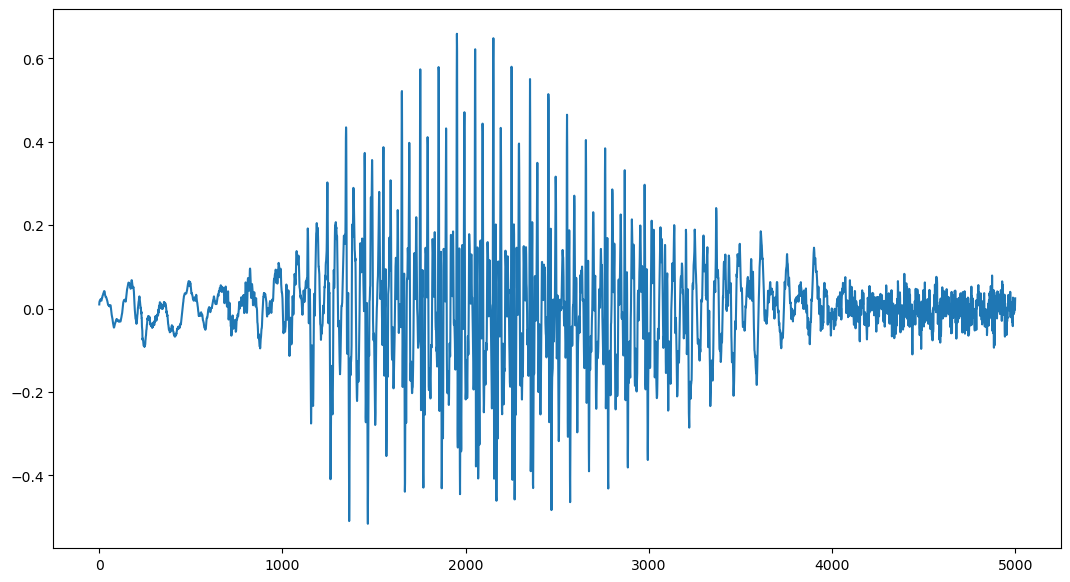

In [11]:
total_ampli = df['amplitude'][0:5000]

# ploting audio wave
figura = plt.figure(figsize=(13,7))
graph = figura.add_subplot()

graph.plot(range(len(total_ampli)), total_ampli)
plt.show()